<a href="https://colab.research.google.com/github/MadeaRiggs/AIPlanet-Data-Science/blob/main/Housing_prediction_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model, model_selection, metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
import joblib

In [ ]:
df = pd.read_csv(r"C:\Users\kimut\Downloads\kami project\california_housing_train.csv.xls")

In [ ]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


In [ ]:
df.shape

(17000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
px.scatter_mapbox(
    df,
    lat="latitude",
    lon="longitude",
    hover_data=["median_house_value"],
    mapbox_style="carto-positron",
)

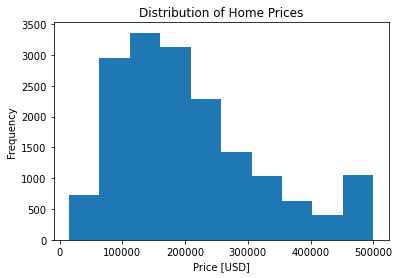

In [ ]:
plt.hist(df['median_house_value'])
plt.xlabel('Price [USD]')
plt.ylabel('Frequency')
plt.title('Distribution of Home Prices');

In [ ]:
# from scipy.sparse import data
# #splitting the dataset
# cutoff_test = int(len(df) * 0.90)
# array= df.values
# X= array[:cutoff_test]
# Y= array[cutoff_test:]
# x_train, x_test, y_train, y_test= model_selection.train_test_split(X, Y, test_size=cutoff_test, random_state=7)

from scipy.sparse import data
#splitting the dataset
y= df['median_house_value']
df.drop(['longitude', 'latitude', 'median_income', 'median_house_value'], axis=1, inplace=True)
X= df

In [ ]:
X.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=99)

In [ ]:
#Decision tree algorithm
tree_model= DecisionTreeClassifier(random_state=0, max_depth=5)

#Fitting the model into training data
tree_model.fit(X_train, y_train)

#Do predictions on test data
y_pred= tree_model.predict(X_test)
print(y_pred)

[500001.  87500. 500001. ... 500001. 500001. 225000.]


In [ ]:
#Calculate accuracy
tree_model.score(X_test, y_test)

0.04735294117647059

In [ ]:
#RandomForest algorithm
random_model= RandomForestClassifier(random_state=0, max_depth=5)

#Fitting the model into training data
random_model.fit(X_train, y_train)

#Do predictions on test data
y_pred= random_model.predict(X_test)
print(y_pred)

[500001. 500001. 500001. ... 500001. 500001. 500001.]


In [ ]:
#Calculate accuracy
random_model.score(X_test, y_test)

0.0488235294117647

In [ ]:
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(random_model, pickle_out) 
pickle_out.close()

In [ ]:
%%writefile house.py
 
from codesnippets import codesnip
import pickle
import pandas as pd
import streamlit as st
from streamlit_option_menu import option_menu
 
# loading the trained model
pickle_in = open('classifier.pkl', 'rb') 
classifier = pickle.load(pickle_in)

df_test = pd.read_csv(r"C:\Users\kimut\Downloads\kami project\california_housing_test.csv.xls")
df_train = pd.read_csv(r"C:\Users\kimut\Downloads\kami project\california_housing_train.csv.xls")
@st.cache()
  
# defining the function which will make the prediction using the data which the user inputs 
def prediction(housing_median_age, total_rooms, total_bedrooms, population, households):   
 
    # Pre-processing user input    
    housing_median_age = float(housing_median_age)
    total_rooms = float(total_rooms)
    total_bedrooms = float(total_bedrooms)
    population = float(population)
    households = float(households)

 
    # Making predictions 
    prediction = classifier.predict( 
        [[housing_median_age, total_rooms, total_bedrooms, population, households]])
     
    return prediction
      
  
# this is the main function in which we define our webpage  
def main():       
    #side bar menu
    
    selected = option_menu(
        menu_title = None,#required
        options =["Home","Code","Predictor"],#required
        icons =["house","code","stars"],#optinal
        menu_icon = "cast",#optinal
        default_index = 0,#optinal
        orientation = "horizontal"     
        )
        
    if selected == "Predictor":
            st.title("housing Predictor")   
            housing_median_age = st.number_input('housing median age')
            total_rooms = st.number_input('total rooms') 
            total_bedrooms = st.number_input("total bedrooms") 
            population = st.number_input("Population")
            households = st.number_input("households")
            result =""
            
            # when 'Predict' is clicked, make the prediction and store it 
            if st.button("Predict"): 
                result = prediction(housing_median_age, total_rooms, total_bedrooms, population, households) 
                st.success('Your Home is {}'.format(result))

    if selected == "Code":
       pass

    if selected == "Home":
        st.markdown(
            """
            # Dataframe :scroll:
            """
        )
        st.subheader("train.csv dataframe")
        st.dataframe(df_train)
        st.subheader("test.csv dataframe")
        st.dataframe(df_test)

        
     
if __name__=='__main__': 
    main()


Overwriting house.py


In [ ]:
!streamlit run house.py

^C
